## Libraries

In [28]:
# !pip install seaborn

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [30]:
import seaborn as sns

### Read file

In [31]:
df= pd.read_csv(r'C:\Users\Alisha\OneDrive\Desktop\DS_PROJECTS GITHUB\python\project 1\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [32]:
df.shape

(11251, 15)

In [33]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Data Cleaning

In [35]:
df.drop([ 'Status','unnamed1'], axis = 1, inplace = True)

In [36]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


In [92]:
# pd.isnull(df)

In [93]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [50]:
df.dropna(inplace = True)

In [51]:
df.shape
# pd.isnull(df).sum()

(11239, 13)

In [53]:
df['Amount'] =df['Amount'].astype('int')

In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [56]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### EDA

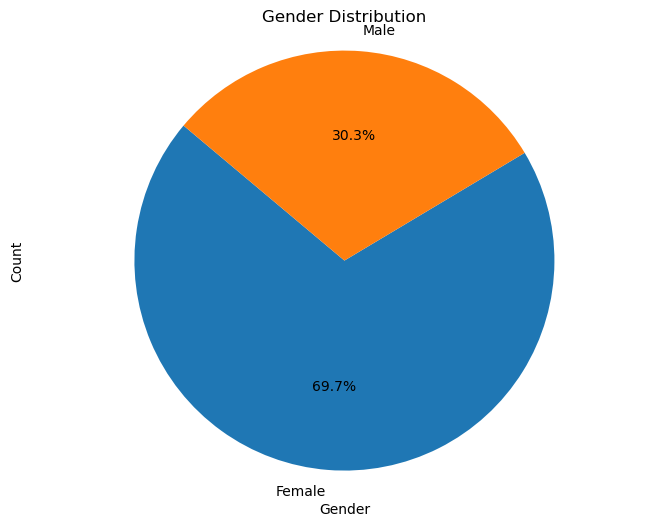

In [85]:
# Calculate gender counts
gender_counts = df['Gender'].value_counts()

# Map gender labels to desired display labels
gender_labels = gender_counts.index.map({'M': 'Male', 'F': 'Female'})

# Create pie chart with updated labels
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140)

# Title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show plot
plt.show()



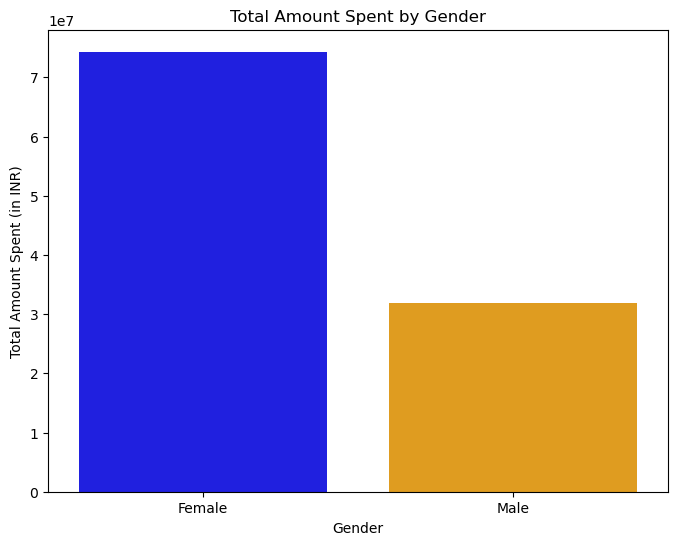

In [104]:
# Calculate the total amount spent by each gender
gender_amount = df.groupby('Gender')['Amount'].sum()

# Convert 'M' and 'F' to 'Male' and 'Female'
gender_amount.index = gender_amount.index.map({'M': 'Male', 'F': 'Female'})

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_amount.index, y=gender_amount.values, hue=gender_amount.index, palette={'Male': 'orange', 'Female': 'blue'}, dodge=False)

# Title and labels
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent (in INR)')  # Updated y-axis label

# Show plot
plt.show()


<Figure size 1000x600 with 0 Axes>

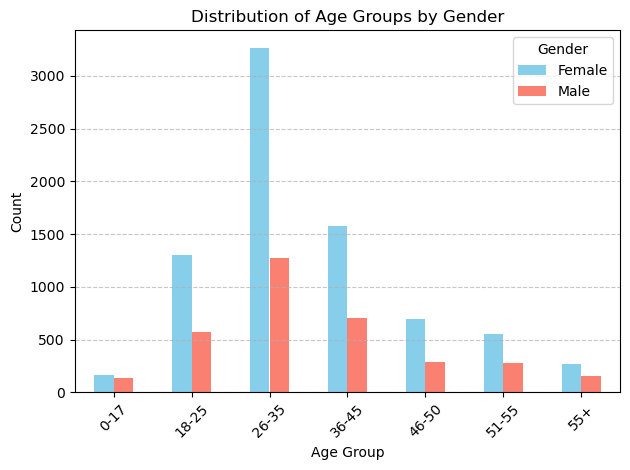

In [103]:
# Pivot the data to create separate columns for each gender within each age group
age_group_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
age_group_gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])  # Adding legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


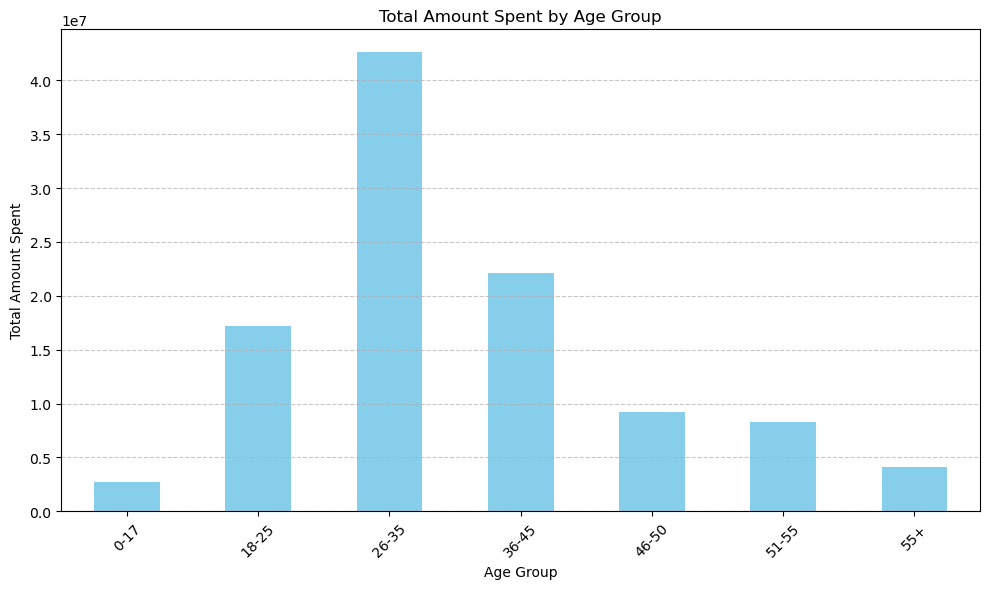

In [105]:
import matplotlib.pyplot as plt

# Group the data by age group and calculate the total amount spent in each group
age_group_amount = df.groupby('Age Group')['Amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
age_group_amount.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


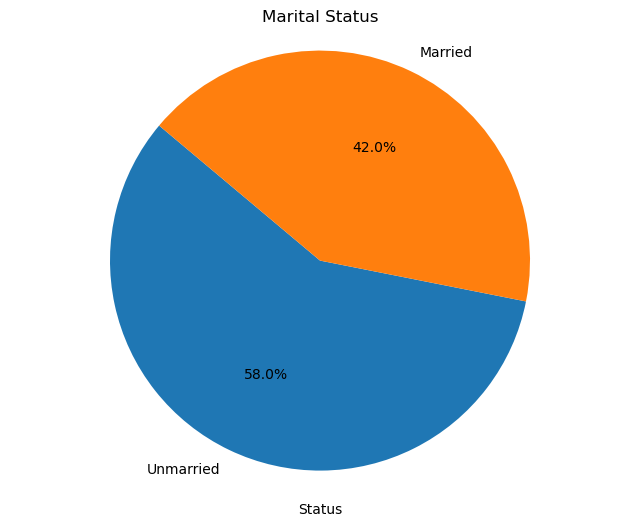

In [108]:
# Calculate marital status counts
marital_status_counts = df['Marital_Status'].value_counts()

# Map marital status labels to desired display labels
marital_labels = marital_status_counts.index.map({0: 'Unmarried', 1: 'Married'})

# Create pie chart with updated labels
plt.figure(figsize=(8, 6))
plt.pie(marital_status_counts, labels=marital_labels, autopct='%1.1f%%', startangle=140)

# Title and labels
plt.title('Marital Status')
plt.xlabel('Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


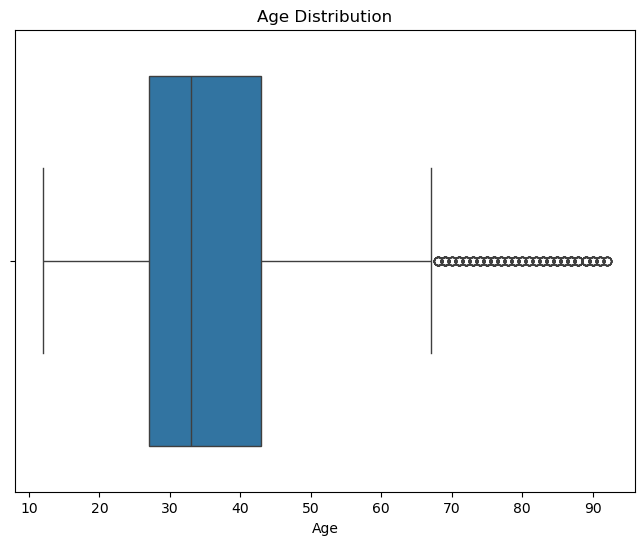

In [114]:
# Box plot for Age distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


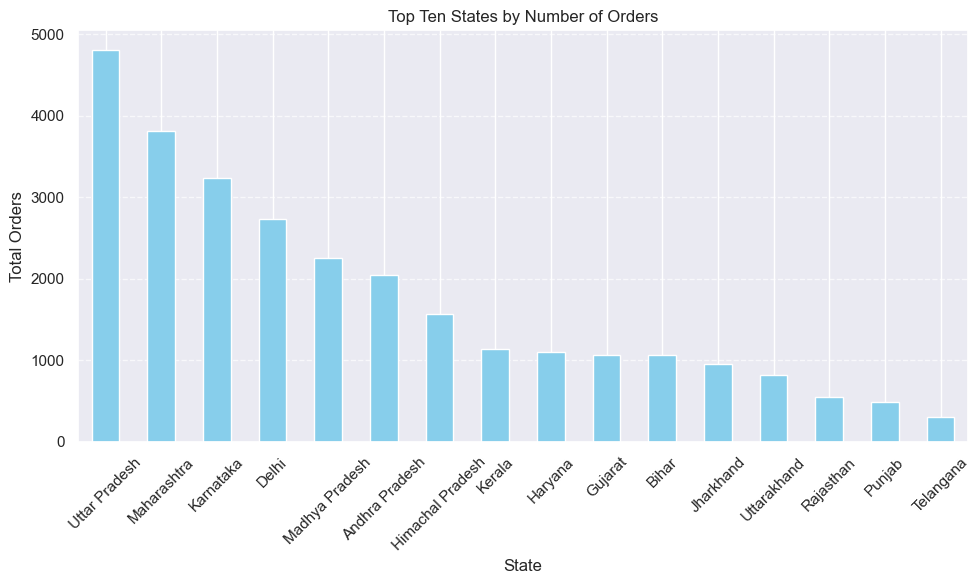

In [123]:
import matplotlib.pyplot as plt

# Group the data by state and calculate the total number of orders in each state
state_orders = df.groupby('State')['Orders'].sum()

# Sort the states based on the number of orders in descending order and select the top ten
top_ten_states = state_orders.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
top_ten_states.plot(kind='bar', color='skyblue')
plt.title('Top Ten States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


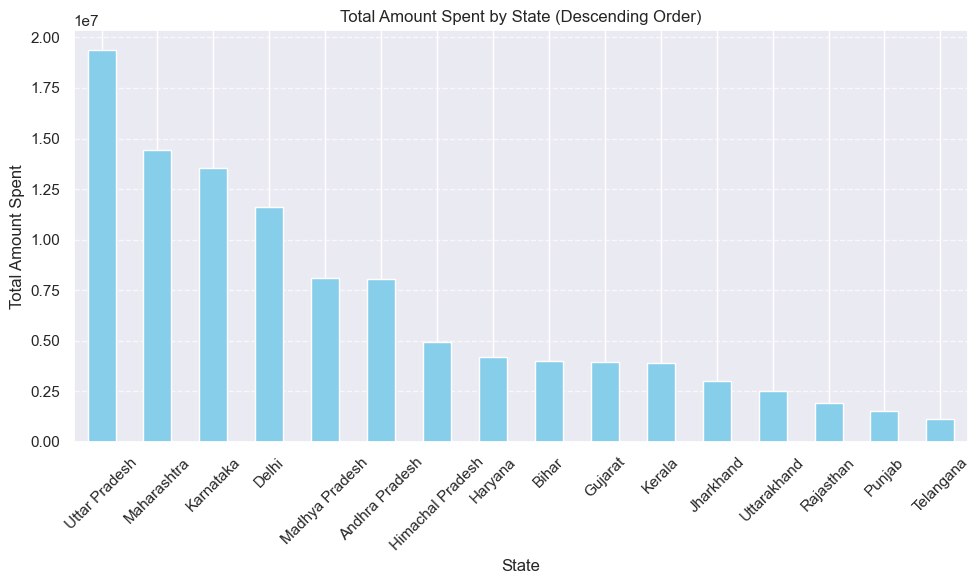

In [122]:
import matplotlib.pyplot as plt

# Group the data by state and calculate the total amount spent in each state
state_amount = df.groupby('State')['Amount'].sum()

# Sort the states based on the total amount spent in descending order
state_amount_sorted = state_amount.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
state_amount_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent by State (Descending Order)')
plt.xlabel('State')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


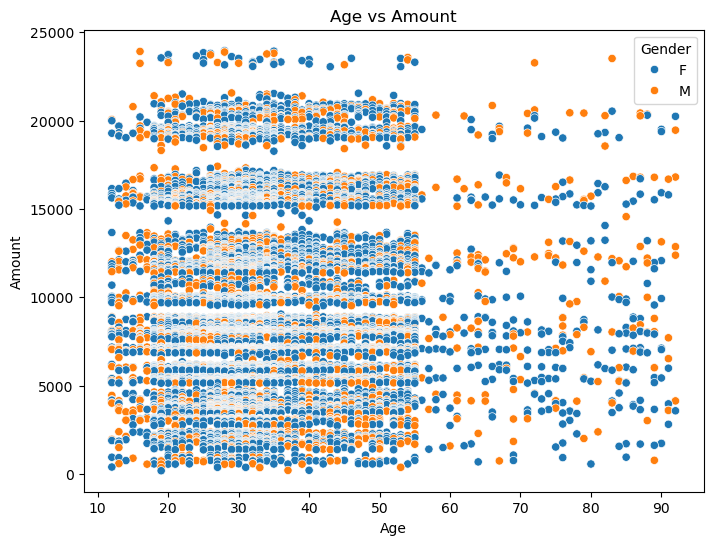

In [63]:
# Scatter plot for Age vs Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Amount', hue='Gender')
plt.title('Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(title='Gender')
plt.show()

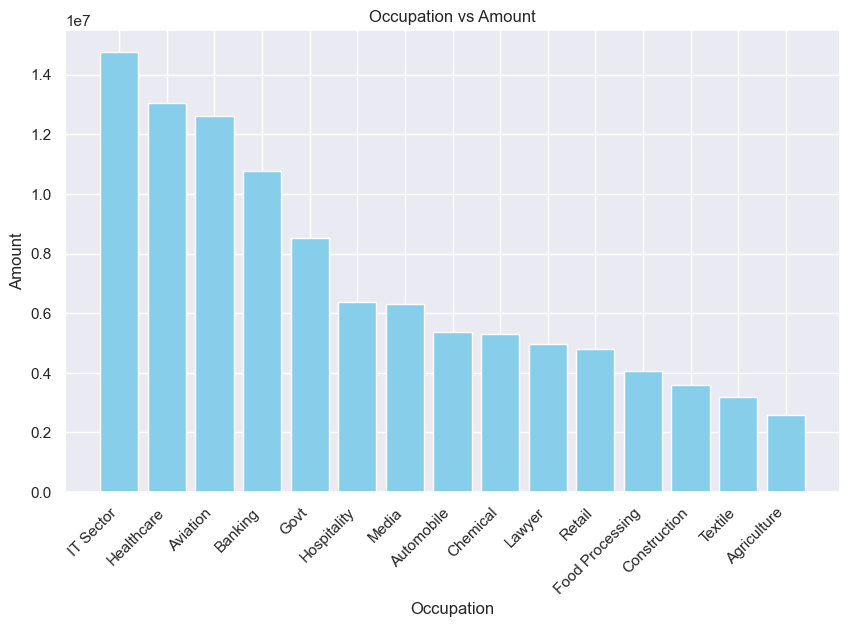

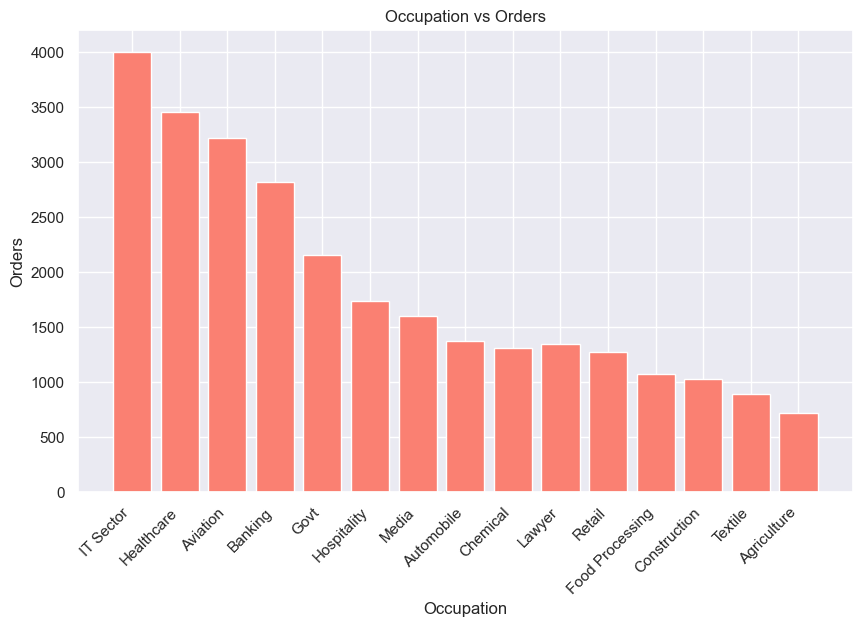

In [125]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Grouping by Occupation and calculating the total amount and total orders for each occupation
occupation_stats = df.groupby('Occupation').agg({'Amount': 'sum', 'Orders': 'sum'}).reset_index()

# Sorting the DataFrame by Amount
occupation_stats_sorted = occupation_stats.sort_values(by='Amount', ascending=False)

# Plotting Occupation vs Amount
plt.figure(figsize=(10, 6))
plt.bar(occupation_stats_sorted['Occupation'], occupation_stats_sorted['Amount'], color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Amount')
plt.title('Occupation vs Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Occupation vs Orders
plt.figure(figsize=(10, 6))
plt.bar(occupation_stats_sorted['Occupation'], occupation_stats_sorted['Orders'], color='salmon')
plt.xlabel('Occupation')
plt.ylabel('Orders')
plt.title('Occupation vs Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


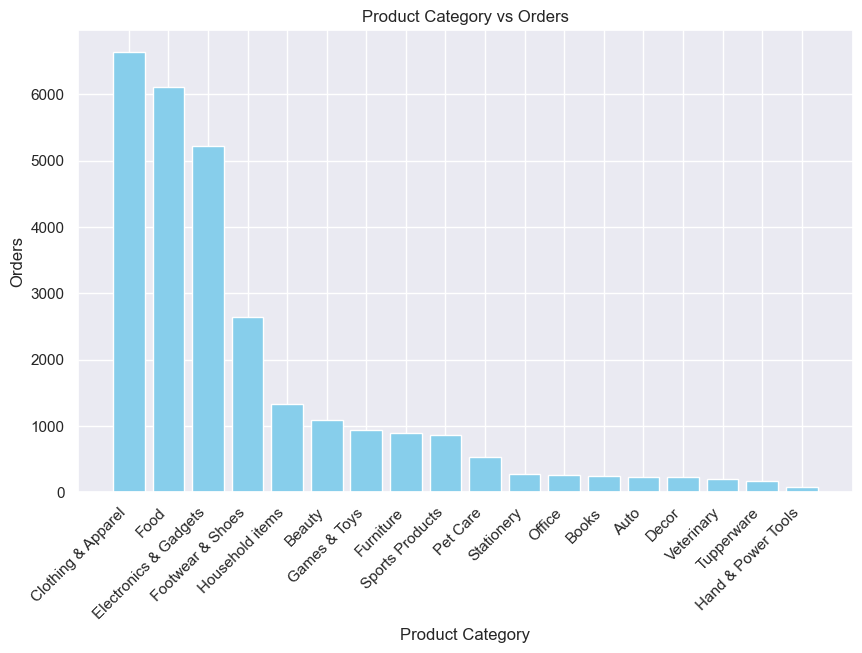

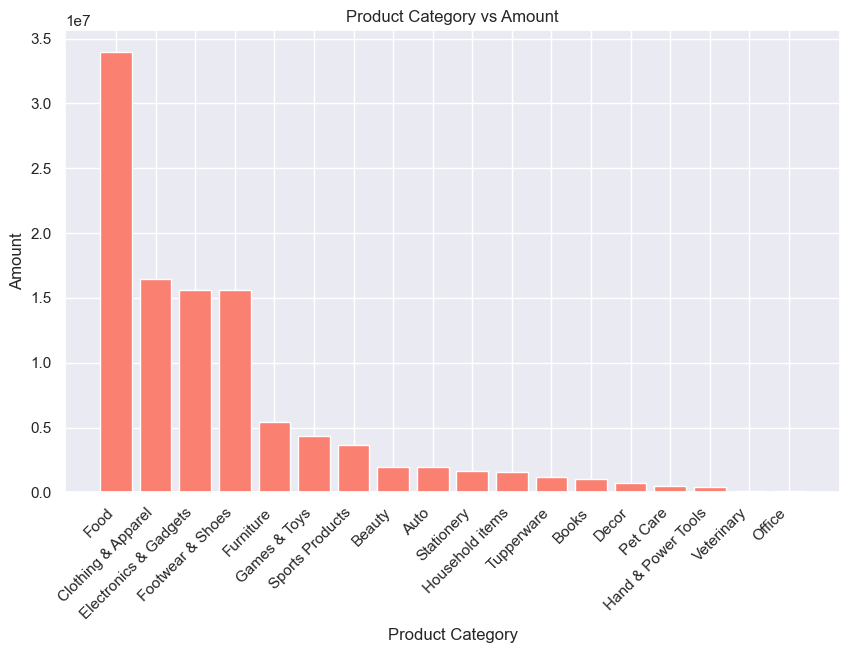

In [126]:
import matplotlib.pyplot as plt

# Grouping by Product_Category and calculating the total amount and total orders for each category
category_stats = df.groupby('Product_Category').agg({'Amount': 'sum', 'Orders': 'sum'}).reset_index()

# Sorting the DataFrame by Orders
category_stats_sorted_by_orders = category_stats.sort_values(by='Orders', ascending=False)

# Plotting Product_Category vs Orders
plt.figure(figsize=(10, 6))
plt.bar(category_stats_sorted_by_orders['Product_Category'], category_stats_sorted_by_orders['Orders'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Orders')
plt.title('Product Category vs Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sorting the DataFrame by Amount
category_stats_sorted_by_amount = category_stats.sort_values(by='Amount', ascending=False)

# Plotting Product_Category vs Amount
plt.figure(figsize=(10, 6))
plt.bar(category_stats_sorted_by_amount['Product_Category'], category_stats_sorted_by_amount['Amount'], color='salmon')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.title('Product Category vs Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


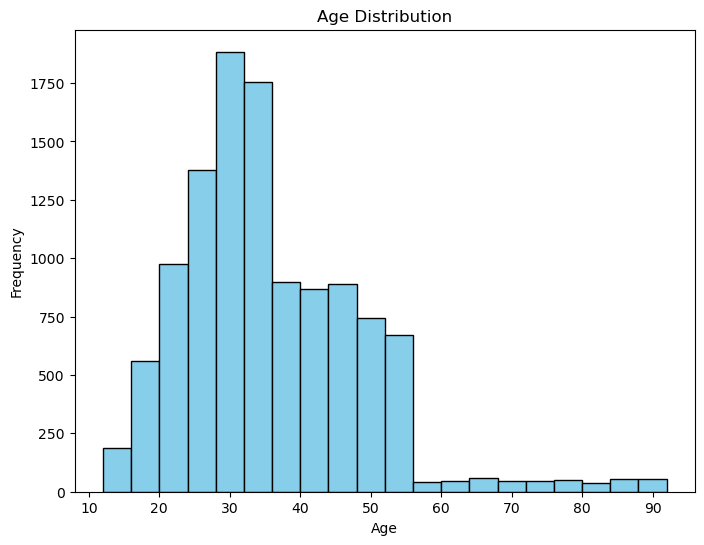

In [66]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


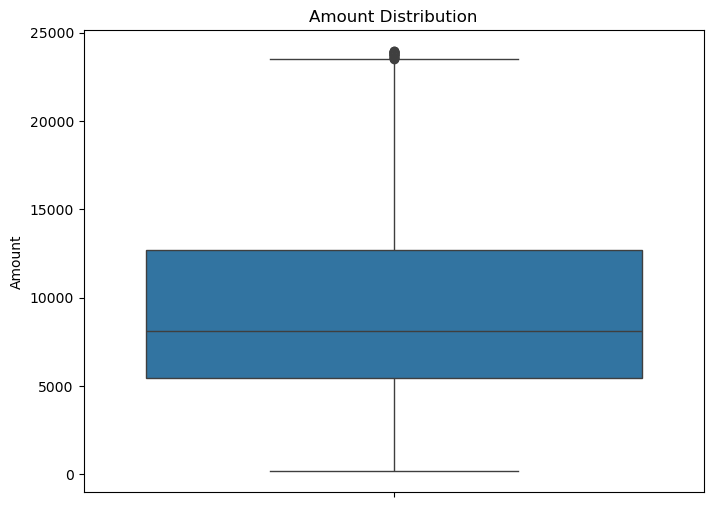

In [67]:
# Box plot for Amount distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Amount')
plt.title('Amount Distribution')
plt.ylabel('Amount')
plt.show()

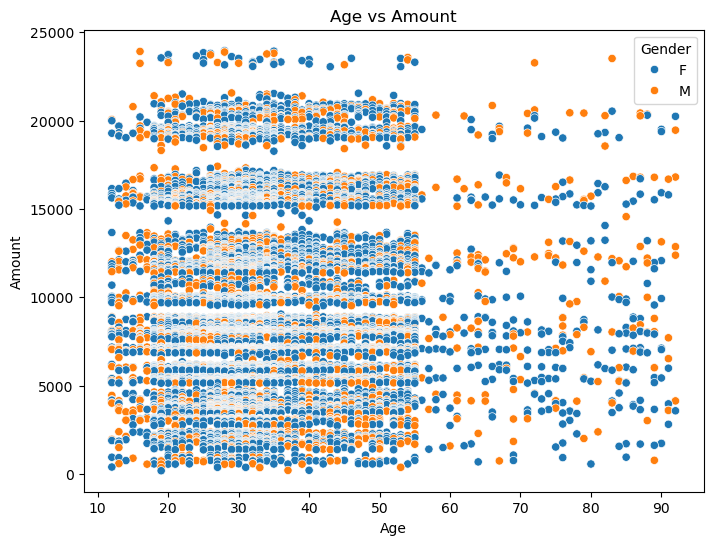

In [69]:
# Scatter plot for Age vs Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Amount', hue='Gender')
plt.title('Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(title='Gender')
plt.show()